# Clustering Crypto

In [231]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [232]:
# Load the crypto_data.csv dataset.
crypto_df_initial = pd.read_csv(Path("./crypto_data.csv"))

In [233]:
# Keep all the cryptocurrencies that are being traded.
crypto_df_initial = crypto_df_initial[crypto_df_initial['IsTrading'] == True]
crypto_df_initial['TotalCoinSupply'] = crypto_df_initial['TotalCoinSupply'].str.replace(' ', '')
crypto_df_initial['TotalCoinSupply'] = pd.to_numeric(crypto_df_initial['TotalCoinSupply'], errors='coerce')
crypto_df_initial.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01
1,365,365Coin,X11,True,PoW/PoS,NaN,2.300000e+09
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08
3,611,SixEleven,SHA-256,True,PoW,NaN,6.110000e+05
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0.000000e+00


In [234]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df_initial = crypto_df_initial[crypto_df_initial['TotalCoinSupply'] != '0']
crypto_df_initial.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01
1,365,365Coin,X11,True,PoW/PoS,NaN,2.300000e+09
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08
3,611,SixEleven,SHA-256,True,PoW,NaN,6.110000e+05
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0.000000e+00


In [235]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df_initial.copy().drop(columns=['IsTrading'])
crypto_df.set_index('Unnamed: 0', inplace=True)

In [236]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()

In [237]:
CoinNamesDF = crypto_df_initial[['CoinName']]
CoinNamesDF.head()

,CoinName
0,42 Coin
1,365Coin
2,404Coin
3,SixEleven
4,808


In [238]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(columns=['CoinName'])
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
808,SHA-256,PoW/PoS,0.000000e+00,0.000000e+00
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07


In [239]:
# Use get_dummies() to create variables for text features.
crypto_df = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
crypto_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
808,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
# Standardize the data with StandardScaler().
crypto_df = StandardScaler().fit_transform(crypto_df)

### Deliverable 2: Reducing Data Dimensions Using PCA

In [241]:
# Using PCA to reduce dimension to three principal components.
# Initialize PCA model
pca = PCA(n_components=3)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_df)

In [242]:
# Create a DataFrame with the three principal components.
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["PC1", "PC2", "PC3"])
    
df_crypto_pca.head()

,PC1,PC2,PC3
0,-0.172805,1.225095,-0.495600
1,-0.158776,1.223542,-0.496102
2,-0.113730,0.820260,-0.298519
3,0.338229,1.953817,-0.544069
4,-0.242216,-1.408971,0.154315


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\Pangloss\.conda\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



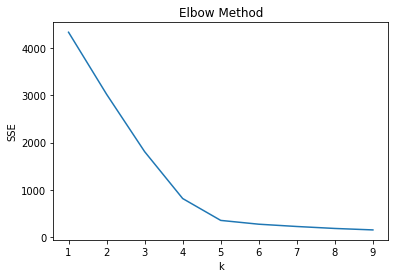

In [243]:
# Create an elbow curve to find the best value for K.
from matplotlib import pyplot as plt

sse = {}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(df_crypto_pca)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

Running K-Means with `k=4`

In [244]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=42)

# Fit the model
model.fit(df_crypto_pca)

# Predict clusters
y_pred = model.predict(df_crypto_pca)
df_y = pd.DataFrame(y_pred, columns=['Class'])
df_y


,Class
0,0
1,0
2,0
3,0
4,1
...,...
680,0
681,0
682,1
683,1


In [245]:
crypto_df_initial

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01
1,365,365Coin,X11,True,PoW/PoS,NaN,2.300000e+09
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08
3,611,SixEleven,SHA-256,True,PoW,NaN,6.110000e+05
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1.000000e+09
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1.000000e+09
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1.400223e+09
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,2.100000e+07


In [246]:
clustered_df = crypto_df_initial.join(df_y, how='inner').join(df_crypto_pca, how='inner')

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(667, 11)


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,Class,PC1,PC2,PC3
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01,0,-0.172805,1.225095,-0.495600
1,365,365Coin,X11,True,PoW/PoS,NaN,2.300000e+09,0,-0.158776,1.223542,-0.496102
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08,0,-0.113730,0.820260,-0.298519
3,611,SixEleven,SHA-256,True,PoW,NaN,6.110000e+05,0,0.338229,1.953817,-0.544069
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0.000000e+00,1,-0.242216,-1.408971,0.154315
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,3.141593e+11,1,-0.357066,-2.076112,0.322690
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0.000000e+00,1,-0.300691,-1.004202,-0.042788
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,2.100000e+07,0,-0.200150,1.380630,-0.451381
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0.000000e+00,1,-0.324322,-2.191057,0.342976
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,8.400000e+07,1,-0.356990,-2.076120,0.322688


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [247]:
# Creating a 3D-Scatter with the PCA data and the clusters
import plotly.express as px

fig = px.scatter_3d(clustered_df, x='PC1', y='PC2', z='PC3', color='Class', width=800, hover_name='CoinName', hover_data=['Algorithm', 'ProofType', 'TotalCoinSupply'])
# fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [248]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(sortable=True, selectable=True)

:Table   [Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,Class,PC1,PC2,PC3]

In [249]:
# Print the total number of tradable cryptocurrencies.
clustered_df['CoinName'].count()

667

In [250]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
clustered_df_scaled = clustered_df.copy()
clustered_df_scaled[['TotalCoinSupply', 'TotalCoinsMined']] = MinMaxScaler().fit_transform(clustered_df[['TotalCoinSupply', 'TotalCoinsMined']])
clustered_df_scaled

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,Class,PC1,PC2,PC3
0,42,42 Coin,Scrypt,True,PoW/PoS,2.281777e-10,6.000000e-11,0,-0.172805,1.225095,-0.495600
1,365,365Coin,X11,True,PoW/PoS,NaN,3.285714e-03,0,-0.158776,1.223542,-0.496102
2,404,404Coin,Scrypt,True,PoW/PoS,5.732618e-03,7.600000e-04,0,-0.113730,0.820260,-0.298519
3,611,SixEleven,SHA-256,True,PoW,NaN,8.728571e-07,0,0.338229,1.953817,-0.544069
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0.000000e+00,1,-0.242216,-1.408971,0.154315
...,...,...,...,...,...,...,...,...,...,...,...
680,BIOB,BioBar,SHA-256D,True,PoW/PoS,NaN,8.571429e-05,0,4.215940,-0.414464,0.047503
681,ZER,Zero,Equihash,True,PoW,3.760403e-05,2.428571e-05,0,-0.172606,1.225073,-0.495607
682,CHAT,OpenChat,Scrypt,True,PoW/PoS,5.432809e-03,1.428571e-03,1,-0.197893,-2.255234,0.297682
683,CDN,Canada eCoin,Scrypt,True,PoW,5.424302e-04,1.428571e-04,1,-0.338829,-2.056901,0.206082


In [251]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
scatter_df = clustered_df_scaled[['CoinName', 'TotalCoinSupply', 'TotalCoinsMined', 'Class', 'Unnamed: 0']]
scatter_df.set_index('Unnamed: 0', inplace=True)

scatter_df.head(10)

,CoinName,TotalCoinSupply,TotalCoinsMined,Class
Unnamed: 0,,,,
42,42 Coin,6.000000e-11,2.281777e-10,0
365,365Coin,3.285714e-03,NaN,0
404,404Coin,7.600000e-04,5.732618e-03,0
611,SixEleven,8.728571e-07,NaN,0
808,808,0.000000e+00,0.000000e+00,1
1337,EliteCoin,4.487990e-01,1.590695e-01,1
2015,2015 coin,0.000000e+00,NaN,1
BTC,Bitcoin,3.000000e-05,9.739493e-05,0
ETH,Ethereum,0.000000e+00,5.850279e-04,1


In [252]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
scatter_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by="Class", width=800)

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)